In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as plt
from pandas import Series, DataFrame

%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


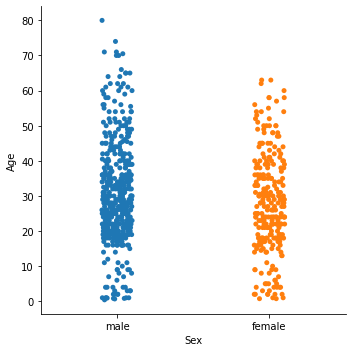

In [5]:
sns.catplot('Sex','Age',data=titanic)

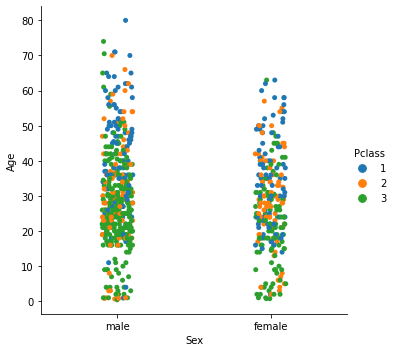

In [6]:
sns.catplot('Sex','Age', hue='Pclass',data=titanic)

In [7]:
def male_female_child(Passenger):
    age,sex= Passenger
    
    if age < 18:
        return 'child'
    else :
        return sex

In [8]:
titanic['person']=titanic[['Age','Sex']].apply(male_female_child, axis=1)

In [9]:
titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


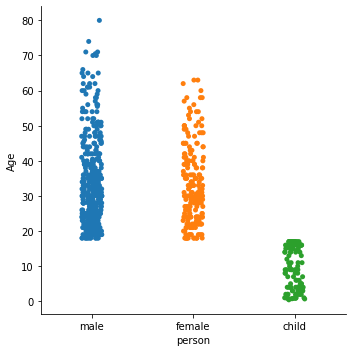

In [10]:
sns.catplot('person','Age', data=titanic)

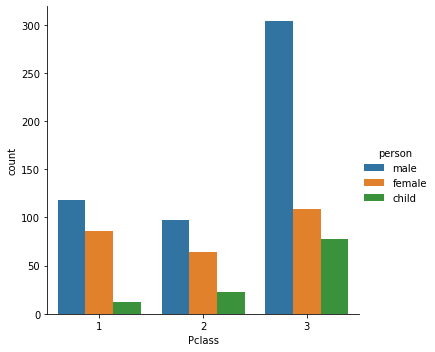

In [11]:
sns.catplot('Pclass', data=titanic, hue='person',kind='count')   # kind= count for bar plot

<AxesSubplot:>

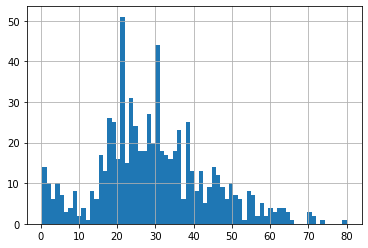

In [12]:
titanic['Age'].hist(bins=70)

In [13]:
titanic['person'].value_counts()

male      519
female    259
child     113
Name: person, dtype: int64

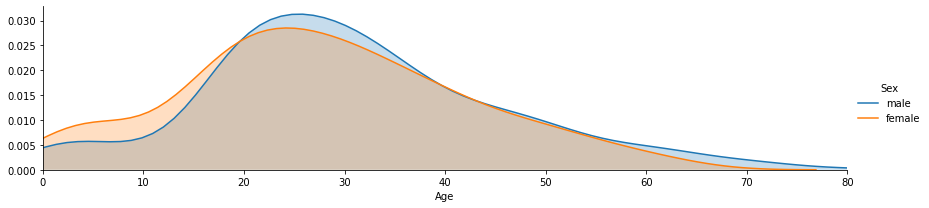

In [14]:
fig= sns.FacetGrid(titanic, hue='Sex', aspect=4)

fig.map(sns.kdeplot,'Age', shade=True)

oldest=titanic['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

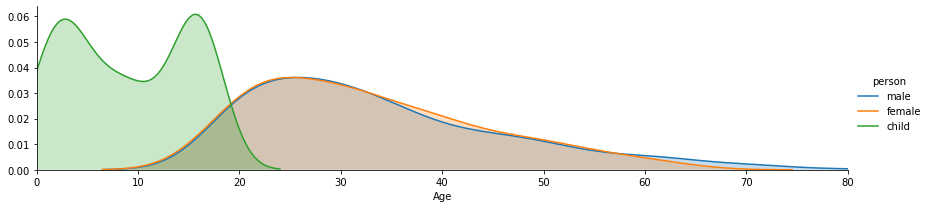

In [15]:
fig= sns.FacetGrid(titanic, hue='person', aspect=4)

fig.map(sns.kdeplot,'Age', shade=True)

oldest=titanic['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

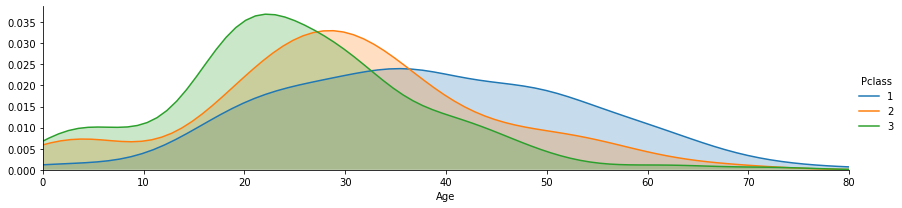

In [16]:
fig= sns.FacetGrid(titanic, hue='Pclass', aspect=4)

fig.map(sns.kdeplot,'Age', shade=True)

oldest=titanic['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [17]:
deck= titanic['Cabin'].dropna()

In [18]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

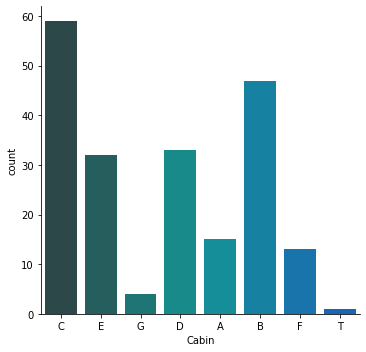

In [19]:
levels=[]

for level in deck:
    levels.append(level[0])
    
    
cabin= DataFrame(levels)

cabin.columns= ['Cabin']

sns.catplot('Cabin', data= cabin, palette='winter_d', kind='count')



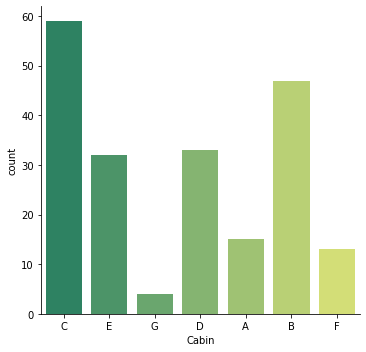

In [20]:
cabin= cabin[cabin.Cabin != 'T']

sns.catplot('Cabin', data=cabin, palette='summer',kind='count')

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


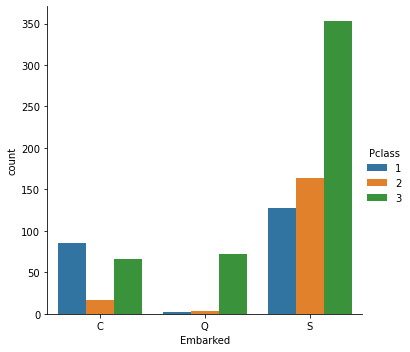

In [22]:
sns.catplot('Embarked', kind='count',data= titanic,order= ['C','Q','S'], hue='Pclass')

In [23]:
# who was alone and with family
titanic['Alone']= titanic.SibSp + titanic.Parch

In [24]:
titanic['Alone'].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: Alone, dtype: int64

In [25]:
titanic['Alone'].loc[titanic['Alone']>0]=='with family'
titanic['Alone'].loc[titanic['Alone']==0]

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


2      0
4      0
5      0
6      0
11     0
      ..
884    0
886    0
887    0
889    0
890    0
Name: Alone, Length: 537, dtype: int64

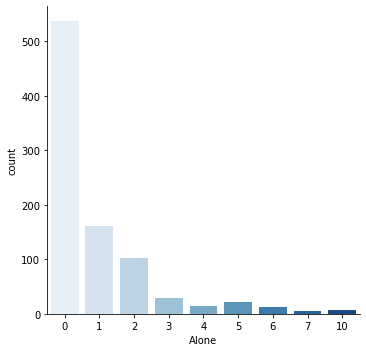

In [26]:
sns.catplot('Alone',data=titanic, palette='Blues',kind='count')

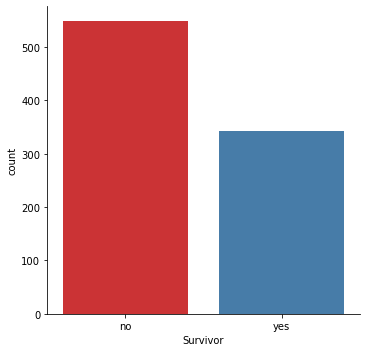

In [27]:
titanic['Survivor']= titanic.Survived.map({0:'no',1:'yes'})

sns.catplot('Survivor',data= titanic, palette='Set1', kind='count')

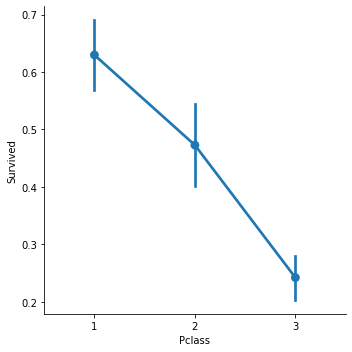

In [28]:
sns.catplot('Pclass','Survived', data=titanic, kind='point')

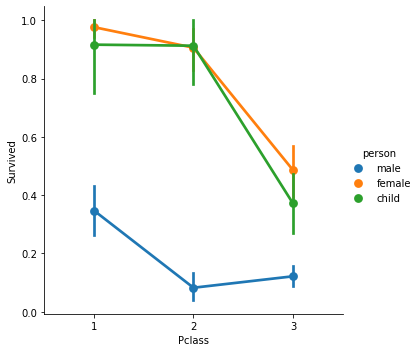

In [29]:
sns.catplot('Pclass','Survived', hue='person',data=titanic, kind='point')

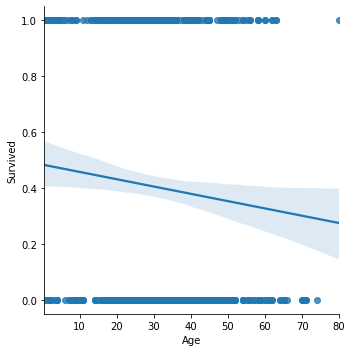

In [30]:
sns.lmplot('Age','Survived', data=titanic)

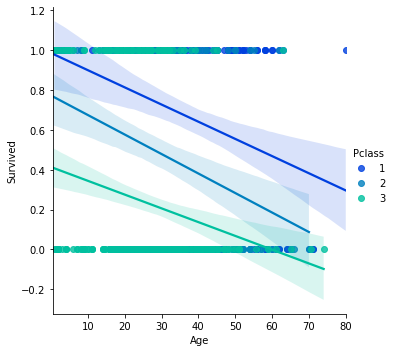

In [31]:
sns.lmplot('Age','Survived', hue='Pclass',data=titanic, palette='winter')

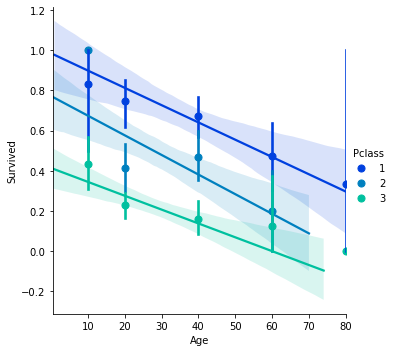

In [32]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived', hue='Pclass',data=titanic, palette='winter',x_bins= generations)

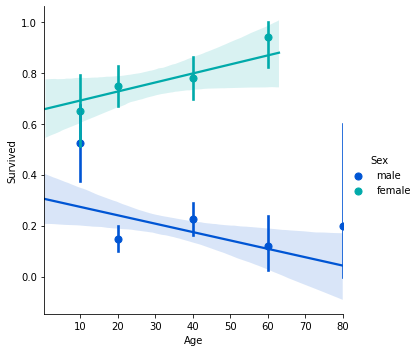

In [33]:
sns.lmplot('Age','Survived', hue='Sex',data=titanic, palette='winter',x_bins= generations)